Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
# %%capture
# ! pip install git+https://github.com/LegrandNico/metadPy.git
# ! pip install pymc

In [2]:
import arviz as az
import numpy as np
import numpyro
from metadPy.bayesian import hmetad

# Set the number of cores used by Numpyro
numpyro.set_host_device_count(2)

# Fitting data at the subject level

## From response-signal arrays
### Using pymc

In [3]:
# Create responses data
nR_S1 = np.array([52, 32, 35, 37, 26, 12, 4, 2])
nR_S2 = np.array([2, 5, 15, 22, 33, 38, 40, 45])

This function will return two variable. The first one is a pymc model variable

In [4]:
model, traces = hmetad(nR_S1=nR_S1, nR_S2=nR_S2, backend="pymc")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c1, d1, meta_d, cS1_hn, cS2_hn]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


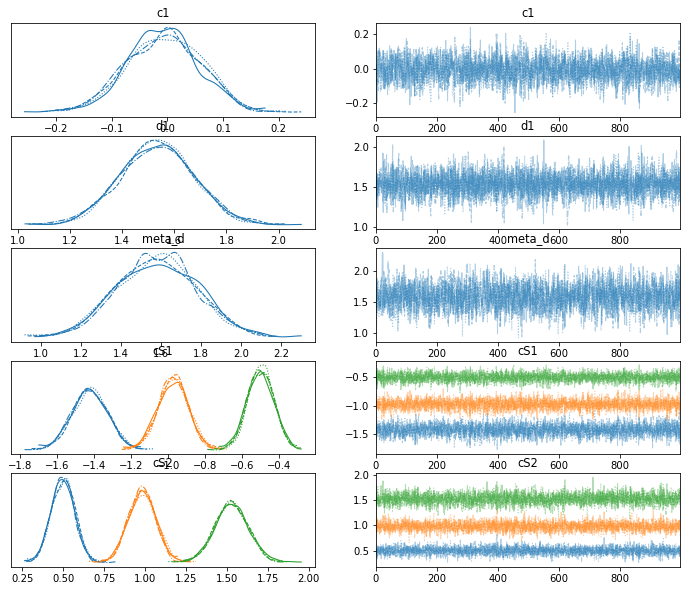

In [7]:
az.plot_trace(traces, var_names=["c1", "d1", "meta_d", "cS1", "cS2"]);

In [8]:
az.summary(traces, var_names=["c1", "d1", "meta_d", "cS1", "cS2"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c1,-0.006,0.066,-0.124,0.116,0.001,0.001,2338.0,2878.0,1.0
d1,1.534,0.140,1.273,1.789,0.002,0.002,4109.0,2503.0,1.0
meta_d,1.578,0.199,1.216,1.949,0.004,0.003,2353.0,2747.0,1.0
cS1[0],-1.423,0.096,-1.598,-1.238,0.002,0.001,2925.0,3051.0,1.0
cS1[1],-0.974,0.082,-1.130,-0.823,0.001,0.001,3119.0,3053.0,1.0
cS1[2],-0.502,0.071,-0.627,-0.360,0.001,0.001,3853.0,3483.0,1.0
cS2[0],0.498,0.071,0.371,0.632,0.001,0.001,3557.0,3478.0,1.0
cS2[1],0.983,0.084,0.831,1.137,0.002,0.001,3094.0,3247.0,1.0
cS2[2],1.529,0.103,1.333,1.718,0.002,0.001,3124.0,2957.0,1.0


# Watermark

In [10]:
%load_ext watermark
%watermark -n -u -v -iv -w -p metadPy,pymc

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Wed Jun 29 2022

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.3.0

metadPy: 0.0.1
pymc   : 4.0.1

numpy  : 1.21.0
arviz  : 0.12.1
sys    : 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
numpyro: 0.9.1

Watermark: 2.3.1

